# Librerias y Lectura Archivos

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#importacion df_final
df=pd.read_csv('../data/processed/v3_final_merge.csv')

In [3]:
df

,edad,sexo,nivel_educativo,fumador,actividad_fisica,vive,diabetes,hipertension,obesidad,cancer,...,region_Sur,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,continente_America,continente_Antarctica,continente_Asia,continente_Europe,continente_Oceania
0,69,0,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1,32,1,2,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,89,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,78,1,1,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,38,0,3,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,1,2,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
49996,35,0,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
49997,46,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
49998,56,1,3,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df.shape

(50000, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     50000 non-null  int64  
 1   sexo                     50000 non-null  int64  
 2   nivel_educativo          50000 non-null  int64  
 3   fumador                  50000 non-null  int64  
 4   actividad_fisica         50000 non-null  int64  
 5   vive                     50000 non-null  int64  
 6   diabetes                 50000 non-null  int64  
 7   hipertension             50000 non-null  int64  
 8   obesidad                 50000 non-null  int64  
 9   cancer                   50000 non-null  int64  
 10  enfermedad_cardiaca      50000 non-null  int64  
 11  epoc                     50000 non-null  int64  
 12  glucosa                  50000 non-null  float64
 13  colesterol               50000 non-null  float64
 14  trigliceridos         

# Estandarización Variables

In [6]:
numerical_columns = ['edad', 'glucosa', 'colesterol', 'trigliceridos', 
                     'hemoglobina', 'leucocitos', 'plaquetas', 'creatinina', 
                     'ingresos_mensuales', 'gastos_salud']

In [7]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns].head()

,edad,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,ingresos_mensuales,gastos_salud
0,0.750106,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,1.499543,2.487493
1,-1.028843,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,2.557298,-0.885562
2,1.711700,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,1.082786,-0.885562
3,1.182823,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,-0.009775,2.487493
4,-0.740365,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0.011400,-0.885562


## Red Neuronal

In [8]:
X = df.drop(columns='vive')
y = df['vive']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo Simple

In [10]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # salida binaria
])


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [12]:
# 6. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.8629 - loss: 0.3792 - precision: 0.8740 - recall: 0.9848 - val_accuracy: 0.8731 - val_loss: 0.3293 - val_precision: 0.8742 - val_recall: 0.9984
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8731 - loss: 0.3305 - precision: 0.8769 - recall: 0.9941 - val_accuracy: 0.8741 - val_loss: 0.3275 - val_precision: 0.8746 - val_recall: 0.9991
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8719 - loss: 0.3307 - precision: 0.8752 - recall: 0.9948 - val_accuracy: 0.8735 - val_loss: 0.3260 - val_precision: 0.8781 - val_recall: 0.9930
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8754 - loss: 0.3276 - precision: 0.8790 - recall: 0.9942 - val_accuracy: 0.8741 - val_loss: 0.3253 - val_precision: 0.8765 - val_recall: 0.9963
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8762 - loss: 0.3205 - precision: 0.8798 - recall: 0.9943 - val_accuracy: 0

In [13]:
y_probs = model.predict(X_test).ravel()
y_pred = (y_probs > 0.5).astype(int)

# 8. Resultados
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
Confusion Matrix:
 [[  95 1233]
 [  88 8584]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.07      0.13      1328
           1       0.87      0.99      0.93      8672

    accuracy                           0.87     10000
   macro avg       0.70      0.53      0.53     10000
weighted avg       0.83      0.87      0.82     10000

F1 Score: 0.9285521120666342


## Class Weight

In [14]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

print(class_weight)

{0: np.float64(3.930817610062893), 1: np.float64(0.5728689275893676)}


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: weights[0], 1: weights[1]}

# Modelo
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units1', 32, 128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.3, step=0.1)))
    model.add(Dense(hp.Int('units2', 16, 64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.3, step=0.1)))
    model.add(Dense(hp.Int('units3', 8, 32, step=8), activation='relu'))  # Extra capa
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[BinaryAccuracy(name="accuracy"), Precision(name="precision"), Recall(name="recall")]
    )
    return model

# Tuner personalizado
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['class_weight'] = class_weight
        return super().run_trial(trial, *args, **kwargs)

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_precision',  # Puedes cambiarlo a 'val_loss' si prefieres
    patience=5,
    restore_best_weights=True
)

# Tuner
tuner = MyTuner(
    build_model,
    objective='val_precision',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='maximize_precision'
)

# Búsqueda con EarlyStopping
tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=80,  # Más épocas porque EarlyStopping lo limitará
             callbacks=[early_stop],
             verbose=1)

# Mejor modelo y evaluación
best_model = tuner.get_best_models(1)[0]
y_pred = (best_model.predict(X_val).ravel() > 0.5).astype(int)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Trial 10 Complete [00h 00m 08s]
val_precision: 0.9451856017112732

Best val_precision So Far: 0.9451856017112732
Total elapsed time: 00h 01m 19s
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
[[ 950  378]
 [2154 6518]]
              precision    recall  f1-score   support

           0       0.31      0.72      0.43      1328
           1       0.95      0.75      0.84      8672

    accuracy                           0.75     10000
   macro avg       0.63      0.73      0.63     10000
weighted avg       0.86      0.75      0.78     10000



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp.values

{'units1': 96,
 'dropout1': 0.2,
 'units2': 32,
 'dropout2': 0.2,
 'units3': 32,
 'lr': 0.0006226484865693727}

In [17]:
model = build_model(best_hp)
model.fit(X_train, y_train, 
          epochs=80, 
          validation_data=(X_val, y_val), 
          class_weight=class_weight)

Epoch 1/80


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.6697 - loss: 0.6410 - precision: 0.9236 - recall: 0.6766 - val_accuracy: 0.7548 - val_loss: 0.5526 - val_precision: 0.9425 - val_recall: 0.7638
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.7563 - loss: 0.5729 - precision: 0.9467 - recall: 0.7643 - val_accuracy: 0.7563 - val_loss: 0.5396 - val_precision: 0.9426 - val_recall: 0.7656
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7523 - loss: 0.5781 - precision: 0.9459 - recall: 0.7603 - val_accuracy: 0.7504 - val_loss: 0.5288 - val_precision: 0.9446 - val_recall: 0.7566
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.7526 - loss: 0.5712 - precision: 0.9476 - recall: 0.7584 - val_accuracy: 0.7474 - val_loss: 0.5475 - val_precision: 0.9445 - val_recall: 0.7530
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.7529 - loss: 0.5782 - precision: 0.9456 - recall: 0.7603 - val_accuracy: 0.7472 - val

In [18]:
# Predecir sobre el conjunto de validación
y_probs = model.predict(X_val).ravel()
y_pred = (y_probs > 0.5).astype(int)

# Métricas de evaluación
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print(f"\nF1 Score: {f1_score(y_val, y_pred):.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
Confusion Matrix:
[[ 933  395]
 [2604 6068]]

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.70      0.38      1328
           1       0.94      0.70      0.80      8672

    accuracy                           0.70     10000
   macro avg       0.60      0.70      0.59     10000
weighted avg       0.85      0.70      0.75     10000


F1 Score: 0.8019


In [19]:
history = model.fit(X_train, y_train, 
                    epochs=80, 
                    validation_data=(X_val, y_val), 
                    class_weight=class_weight)

Epoch 1/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7320 - loss: 0.4502 - precision: 0.9746 - recall: 0.7113 - val_accuracy: 0.6961 - val_loss: 0.5618 - val_precision: 0.9397 - val_recall: 0.6941
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.7292 - loss: 0.4487 - precision: 0.9761 - recall: 0.7072 - val_accuracy: 0.7005 - val_loss: 0.5545 - val_precision: 0.9397 - val_recall: 0.6995
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7276 - loss: 0.4513 - precision: 0.9740 - recall: 0.7061 - val_accuracy: 0.6947 - val_loss: 0.5635 - val_precision: 0.9366 - val_recall: 0.6950
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.7299 - loss: 0.4511 - precision: 0.9744 - recall: 0.7092 - val_accuracy: 0.6923 - val_loss: 0.5705 - val_precision: 0.9384 - val_recall: 0.6905
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.7328 - loss: 0.4422 - precision: 0.9750 - recall: 0.7132 - val_accuracy: 0

## Curvas 

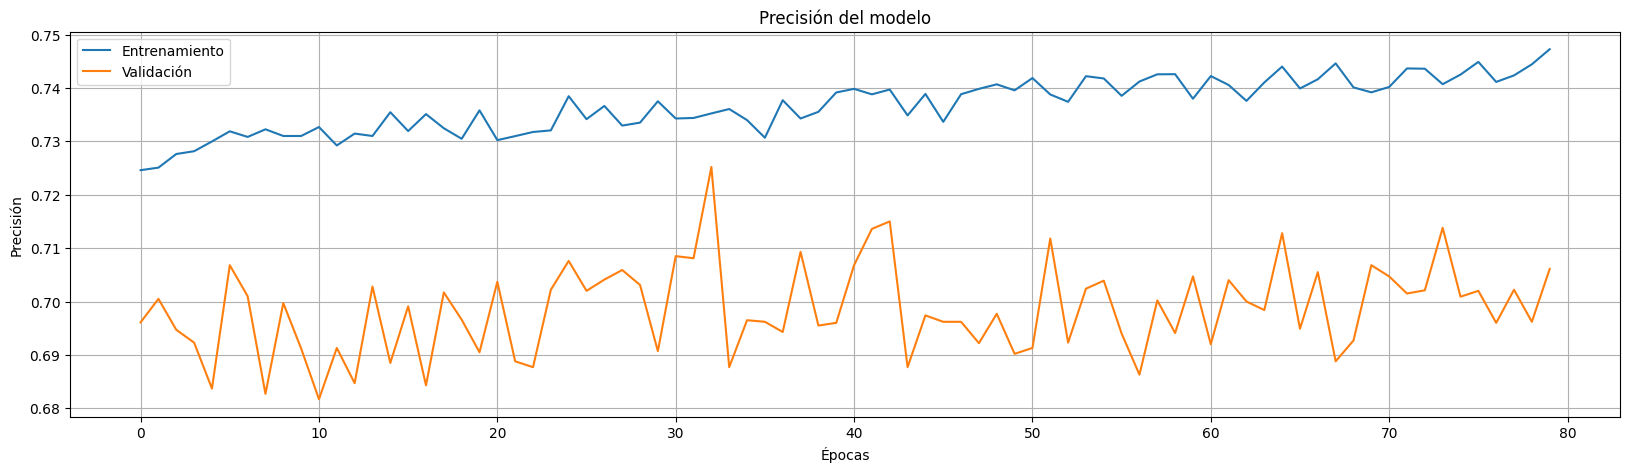

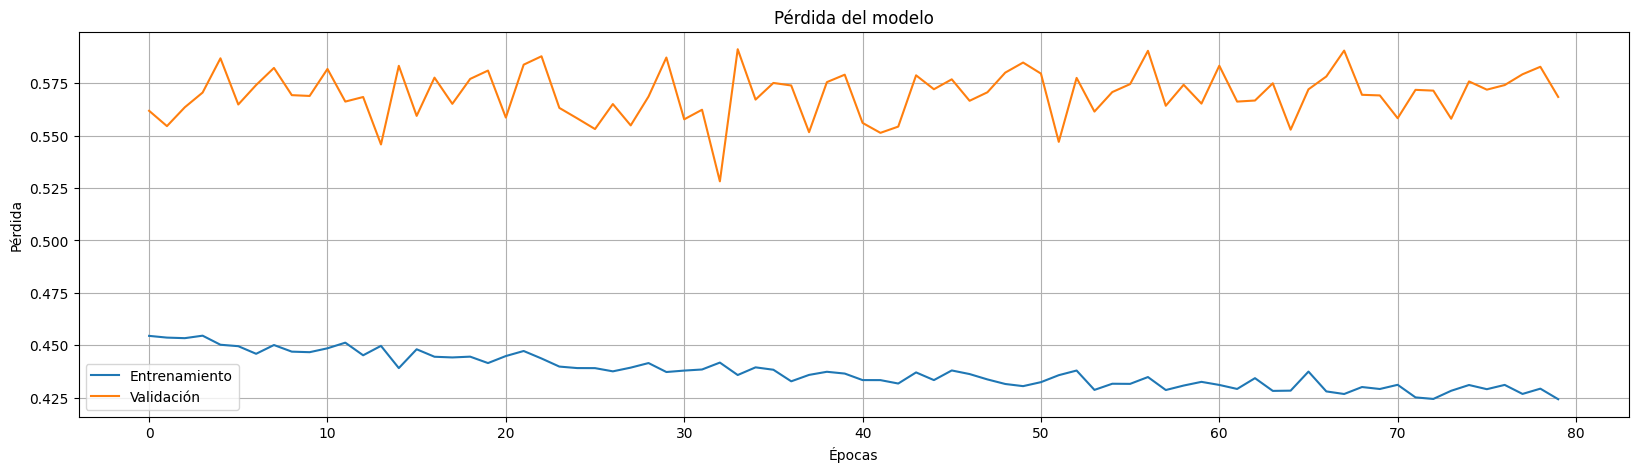

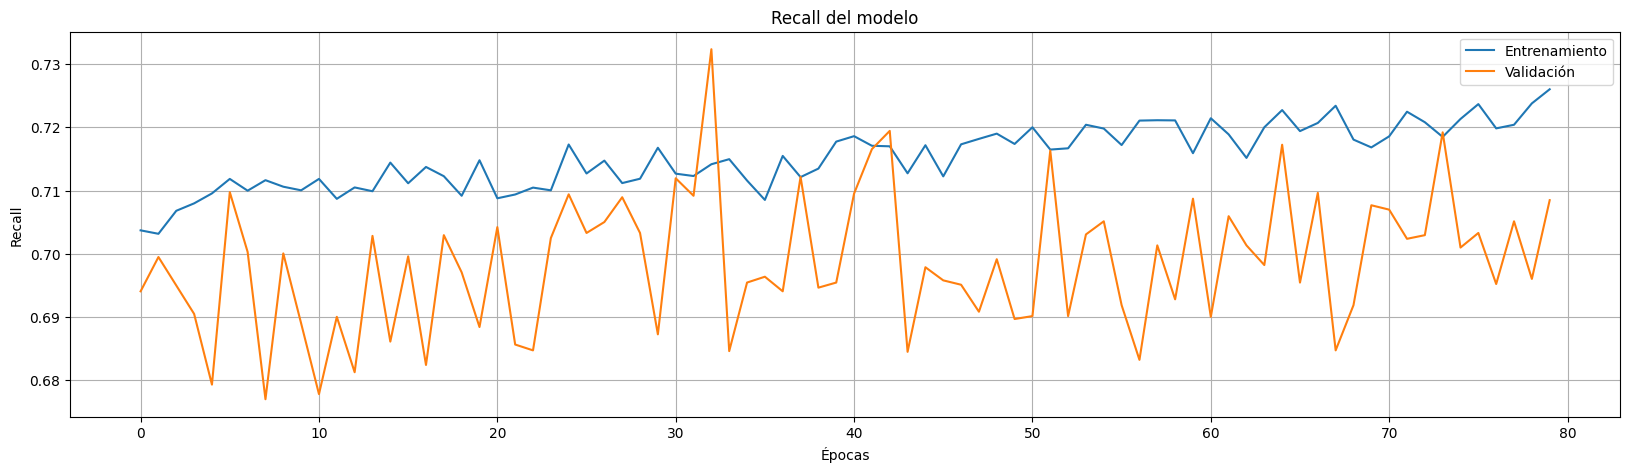

In [20]:
import matplotlib.pyplot as plt

# --- Precisión ---
plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# --- Pérdida ---
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# --- Recall ---
plt.figure(figsize=(20, 5))
plt.plot(history.history['recall'], label='Entrenamiento')
plt.plot(history.history['val_recall'], label='Validación')
plt.title('Recall del modelo')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()